In [1126]:
import shapely
import math
shapely.__file__
import fiona # need to install from src in order for buffering to work. see: https://github.com/geoplex/elasticsearch-spatial/issues/1
import sys
sys.path.append('../../alg')
import distance_buffer as db
import numpy as np

from matplotlib import pyplot


In [1127]:
shp = fiona.open("../../data/YukonAlaska/YukonRegionCRS.shp")

In [1128]:
print shp.schema
l = iter(shp)

{'geometry': 'Polygon', 'properties': OrderedDict([(u'SASAP_Regi', 'str:100'), (u'Shape_Leng', 'float:19.11'), (u'Shape_Area', 'float:19.11')])}


In [1129]:
first = next(l)

In [1130]:
shp_geom = shapely.geometry.shape(first['geometry'])


In [1131]:
# This is a sufficiently irregular shape so we will go with this one
region = shp_geom
print len(region.exterior.coords)
print len(region.interiors)
print region.area
print type(region)
regionring = region.exterior

183
0
4918771.66688
<class 'shapely.geometry.polygon.Polygon'>


In [1132]:
shp.crs

{u'a': 6378137,
 u'b': 6378137,
 u'k': 1,
 u'lon_0': 0,
 u'no_defs': True,
 u'proj': u'merc',
 u'units': u'm',
 u'x_0': 0,
 u'y_0': 0}

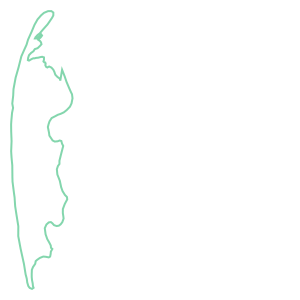

In [1133]:
regionring

In [1134]:
newpoly = shapely.geometry.Polygon(list(region.exterior.coords))
print len(region.exterior.coords)

183


In [1135]:
reload(db)

<module 'distance_buffer' from '../../alg/distance_buffer.py'>

In [1136]:
buffer1 = newpoly.buffer(-150.0)
buffer2 = buffer1.buffer(-150.0)
buffer3 = buffer2.buffer(-150.0)
buffer4 = buffer3.buffer(-150.0)
buffers = [ newpoly, buffer1, buffer2, buffer3]

In [1146]:
%%time
candpts, inflpts, places = db.find_cand_points_buffers(buffers, 100.0)

poly
LINE EQ: 
y = 2.81879977217*x + 3105937.19774
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.81433945352 -8.81433945352
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.0046975346865*x + 1324331.96937
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
3.78597207804 -3.51126220898
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.911510001223*x + 1902408.68142
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.38802077805 -2.93903119435
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 1.03660831303*x + 1981333.0166
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.23871189089 -3.39928141739
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -1.34477606058*x + 479040.220796
ENTERING PT SEG CIRCLE ENTERI

y = -0.338532540211*x + 1109565.71468
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.10519348959 -3.20039730797
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -1.14021585568*x + 604060.28371
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.38650654519 -3.97698694463
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.776732211233*x + 833270.982659
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.518652158246 -7.56828847701
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.63554494112 -8.63554494112
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.159372006792*x + 1423603.73254
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
3.22716286035 -3.78397575457
no intercept (there would b

9.78273272791 -14.5129272904
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.173439590827*x + 1217175.54238
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.81379527221 -15.4582548944
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.0768193164334*x + 1278156.97377
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
7.86383393979 -16.3535285966
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.0183958187584*x + 1338250.20497
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
6.93247284057 -17.1817099008
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.113945562964*x + 1398553.25657
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
6.01752631801 -17.9247243547
no intercept (there would be one if the line se

0.375347698097 -2.31539436027
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.21995333511 -2.21995333511
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -7.74914854137*x + -3563181.14511
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.4896891143 -3.92246439843
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -5.67832589264*x + -2256886.43506
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.27015099069 -22.8495481826
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -3.66614771341*x + -987590.029268
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.27555740403 -23.748462968
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.67085356552*x + -359754.964772
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE EN

LINE EQ: 
y = 10.0158476219*x + 7642124.82438
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.2770358262 -14.634281004
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 146.90058061*x + 94004869.7082
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
9.31030762469 -15.5784092311
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -11.6131287831*x + -6003953.76864
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.3611198809 -16.4776593043
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -7.51730547536*x + -3419838.5052
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.721226746013 -1.6981077669
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
4.36090539431 -4.36090539431
no intercept (there wou

y = -0.939732156814*x + 733513.773864
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.28940331097 -21.4274941207
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.853596289765*x + 787860.178208
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.284750523254 -22.7939601136
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
16.9077058786 -16.9077058786
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.774213356457*x + 837945.034292
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
11.3787456298 -12.8076134122
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.700495813523*x + 884454.606334
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.3818231984 -13.803520625
no intercept (there would

y = 14.4952220696*x + 10471703.2955
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.9357440873 -14.7090129595
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 41.9396544731*x + 27789012.6423
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
9.9423832619 -15.6985231025
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -47.1614465751*x + -28433396.8665
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.95314443292 -16.6784521351
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -15.0744333128*x + -8186639.42274
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
7.96822213224 -17.6450006328
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -8.94919401535*x + -4321647.14055
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRC

ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
6.37478354153 -20.3710573589
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 17.0494630333*x + 12075688.1056
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
5.39810006097 -21.2787476343
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 26.9599768408*x + 18325773.8398
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
8.81706389356 -44.4314941341
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 64.2444370146*x + 41839303.5667
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.529506027 -60.8389472034
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.10729971073*x + 1391067.05278
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG 

LINE EQ: 
y = -25.2749324884*x + -14629217.3184
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.537417024488 -1.09255431011
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.76222645363 -1.76222645363
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -87.180559079*x + -53706142.7319
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.50700623142 -1.83651435181
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.37712738936 -2.37712738936
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 16.4905273352*x + 11734729.3487
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.48536091879 -3.63460687704
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 11.0009453021*x + 8269532.65415
ENTERING PT SEG CIR

LINE EQ: 
y = -3.17912526974*x + -681696.160447
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
16.3760601177 -19.1841589281
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -3.00760468544*x + -573497.873779
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
30.7496673004 -40.3608945907
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.85205924209*x + -475377.234014
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.53176971753 -2.12922663196
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.73554197087*x + -401879.858937
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
12.6728910698 -74.5512881514
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -2.62716850622*x + -333519.624602
ENTERING PT SEG CIRCLE ENTER

y = -0.665477324845*x + 906367.790544
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
22.6133323617 -9.18556370322
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.631554624975*x + 927772.481388
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.5155433767 -5.23676136652
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.6149765241*x + 938232.801918
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
37.5216710268 -25.2883752876
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.598640118917*x + 948540.569344
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
18.0081356225 -13.3305342698
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.582535603667*x + 958701.9224
ENTERING PT SEG CIRCLE ENTERING PT SEG CIR

In [1138]:
flat = []
flatp = []
for pts in places:
    for p in pts:
        for x in p:
            flatp.append(x)
            
#print len(inflpts[1][0])
for pts in inflpts:
    for p in pts:
        for x in p:
            #if x[0] == -630758.0382403552 and x[1]== 1323597.9202250196:
            #    print "DUP"
            flat.append(x)
            
print flatp
#print len(flat[0])


[]


In [1139]:
temp = zip(*flatp)
print len(flatp)
temp2 = zip(*flat)


0


In [1140]:
testpts = [[-630955.6655421, 1327065.67552177], [-630852.08341026, 1327204.49461844], [-630929.275761, 1327074.75823]]
#np.rad2deg(db.ang_bw_vectors())

In [1142]:
ax, fig = db.plot_fig(newpoly)
#xreg,yreg = region.exterior.xy
#xbuf1, ybuf1 = buffer1.exterior.xy
#db.plot_coords_list(ax, inflpts[0][0],dotsize=5.5,color="pink", alpha="1.0" , zorder=7)
#ax.scatter(temp[0], temp[1], 5.5, color="pink", zorder=7, alpha=1.0)
#ax.scatter(temp2[0], temp2[1], 5.5, color="red", zorder=7, alpha=1.0)
#[ -630955.6655421   1327065.67552177] [ -630852.08341026  1327204.49461844] -630995.22314, 1327052.06078
#[ -630375.22772554  1326551.92661303] [ -630443.3723821   1326392.68997916] -630411.440344, 1326333.05893
cpt =[ -630375.22772554,  1326551.92661303] # [ -630955.6655421,   1327065.67552177] 
lastcpt= [ -630443.3723821,   1326392.68997916]#[ -630852.08341026,  1327204.49461844] 
pt1 = [-630411.440344, 1326333.05893]#[-630929.275761, 1327074.75823]
#ax.plot([lastcpt[0],cpt[0]], [lastcpt[1],cpt[1]],'x',color="green", alpha=1.0, zorder=7)
#ax.plot([lastcpt[0],pt1[0]], [lastcpt[1],cpt[1]],'o',color="blue", alpha=1.0, zorder=7)
#ax.scatter([-630929.275761 ], [1327074.75823],5.5,color="brown", alpha=1.0, zorder=7)

#db.plot_coords_list(ax, inflpts[1][0],dotsize=5.5,color="pink", alpha="1.0", zorder=7)

db.plot_dist_buffers(ax, buffers, alpha=0.5)

num of buffers 3


In [1143]:
for i in range(0,len(candpts)):
    #print list(candpts[i])
    for j in range(0, len(candpts[i])):
        db.plot_coords_list(ax, candpts[i][j], color="#000000", zorder=3 )
        db.plot_radii(ax, candpts[i][j], 100.0, color='red', zorder=4, alpha=0.3)
        #print "\t"+str(len(candpts[i][j]))
        #for k in range(0, len(candpts[i][j])):
            
            
            #print "\t\t"+str(len(candpts[i][j][k]))
            #print list(candpts[i][j][k])


In [ ]:
ab=db.ang_bw_vectors(np.array(lastcpt), np.array(cpt), np.array(lastcpt), np.array(pt1))
np.rad2deg(ab)

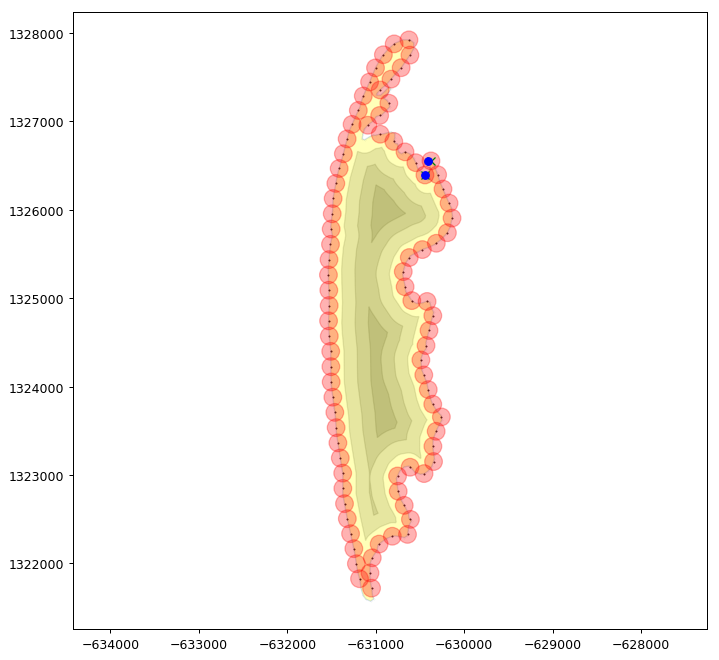

In [1144]:
#ax.plot([c1[0], c2[0]], [c1[1], c2[1]], color="green", alpha=0.5)
#ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color="blue", alpha=0.5)
pyplot.show()

In [ ]:
shapely.

In [ ]:
print len(buffer1.exterior.coords)
print len(newpoly.exterior.coords)

In [ ]:
#c2 = np.array([ -631079.88319404,  1324653.40708579])
c1 = np.array(candpts[0][0][2])
c2 = np.array(candpts[0][0][3])
pt1 = np.array(newpoly.exterior.coords[165])
pt2 = np.array(newpoly.exterior.coords[179])

In [ ]:
db.eucdist(pt1[0],pt1[1],pt2[0],pt2[1])

In [ ]:
(100*math.sqrt(3))/2

In [ ]:
print pt1, pt2, c1, c2

In [ ]:
print pt2

In [ ]:
vec1 = np.array(c2-c1)
vec1n = vec1 / np.linalg.norm(vec1)
vec2 = np.array(pt2-pt1)
vec2n = vec2 / np.linalg.norm(vec2)

In [ ]:
print vec1, vec2
print vec1n, vec2n

In [ ]:

dp = np.dot(vec1n, vec2n)

In [ ]:
ang = np.rad2deg(math.acos(dp))
print ang

In [ ]:
angt = db.ang_bw_vectors(c1, c2, c1, pt2)
print np.rad2deg(angt)